# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [18]:
# Part A

#  Imports and common helper functions which will be used later in many codeblocks
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

def load_bgr_from_url(url: str, timeout: int = 20) -> np.ndarray:
    """Download an image from a URL and decode with OpenCV (returns BGR uint8)."""
    r = requests.get(url, timeout=timeout)
    r.raise_for_status()
    nparr = np.frombuffer(r.content, np.uint8)
    img_bgr = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    if img_bgr is None:
        raise ValueError("Could not decode image bytes into an OpenCV image.")
    return img_bgr

def to_rgb(img_bgr: np.ndarray) -> np.ndarray:
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def show(img, title: str = "", cmap=None, figsize=(6,6)):
    plt.figure(figsize=figsize)
    if cmap is None:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

def normalize01(x: np.ndarray) -> np.ndarray:
    x = x.astype(np.float32)
    x = x - x.min()
    mx = x.max()
    return x / (mx + 1e-8)


In [19]:
img_path1  = "https://picsum.photos/seed/cv_assign_img1/512/512"
img_path2 = "https://picsum.photos/seed/cv_assign_img2/512/512"


Loaded image dtype: uint8
RGB image shape (H, W, C): (512, 512, 3)


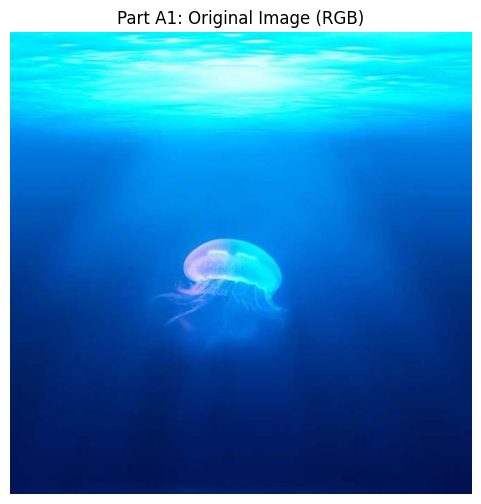

In [20]:
# Part A1: Loading Image-1 (BGR) and displaying in RGB

img_bgr = load_bgr_from_url(img_path1)
img_rgb = to_rgb(img_bgr)

print("Loaded image dtype:", img_rgb.dtype)
print("RGB image shape (H, W, C):", img_rgb.shape)

show(img_rgb, "Part A1: Original Image (RGB)")


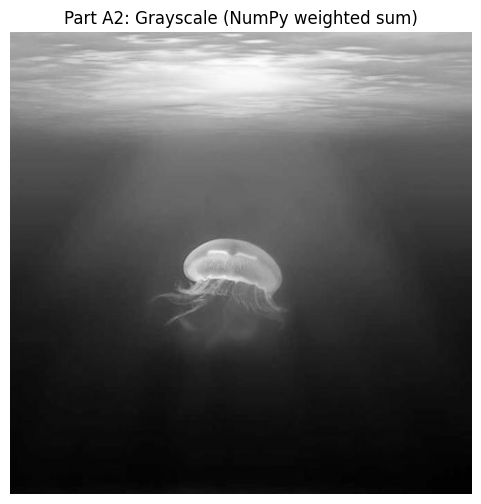

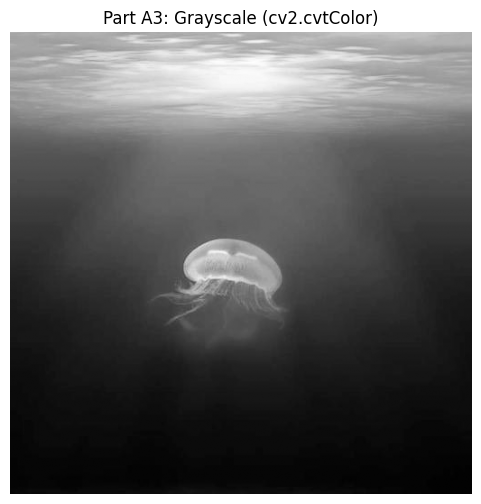

Mean absolute difference (NumPy vs cv2): 0.1866372674703598
Max absolute difference (NumPy vs cv2): 0.5030059814453125
RGB shape: (512, 512, 3)
Gray (NumPy) shape: (512, 512)
Gray (cv2) shape: (512, 512)

Sample pixel values:
  (y=0, x=0) RGB=[  8 246 255] | gray_np=175.86 | gray_cv=176.00
  (y=10, x=10) RGB=[  1 231 254] | gray_np=164.85 | gray_cv=165.00
  (y=100, x=200) RGB=[  0 235 254] | gray_np=166.90 | gray_cv=167.00
  (y=256, x=256) RGB=[ 34 229 251] | gray_np=173.20 | gray_cv=173.00
We clearly see that the grayscale values of the grayscale image produced by the weighted sum NumPy method and cv2.cvtColour function are very close enough justifying the weighted formula used for the conversion.


In [21]:
# Part A2: Converting to grayscale using weighted sum (NumPy)

img_rgb_f = img_rgb.astype(np.float32)

R = img_rgb_f[..., 0]
G = img_rgb_f[..., 1]
B = img_rgb_f[..., 2]

gray_np = (0.299 * R + 0.587 * G + 0.114 * B)  # float32 grayscale
# For display, normalizing to [0,1]
show(normalize01(gray_np), "Part A2: Grayscale (NumPy weighted sum)", cmap="gray")

# Part A3: Grayscale using cv2.cvtColor and compare
gray_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY).astype(np.float32) #as cv2 expects in uint8 values

show(normalize01(gray_cv), "Part A3: Grayscale (cv2.cvtColor)", cmap="gray")

# To show comparison, I have taken the difference between the numpy arrays and displayed the mean and max values for analysis
diff = np.abs(gray_np - gray_cv)
print("Mean absolute difference (NumPy vs cv2):", float(diff.mean()))
print("Max absolute difference (NumPy vs cv2):", float(diff.max()))

# Part A4: Print shapes
print("RGB shape:", img_rgb.shape)       # H x W x 3 (3 channels for the 3 colours)
print("Gray (NumPy) shape:", gray_np.shape)  # H x W
print("Gray (cv2) shape:", gray_cv.shape)    # H x W

# Part A5: Print a few pixel values
coords = [(0,0), (10,10), (100,200), (img_rgb.shape[0]//2, img_rgb.shape[1]//2)]
print("\nSample pixel values:")
for (y,x) in coords:
    rgb_val = img_rgb[y, x, :]
    g_np = gray_np[y, x]
    g_cv = gray_cv[y, x]
    print(f"  (y={y}, x={x}) RGB={rgb_val} | gray_np={g_np:.2f} | gray_cv={g_cv:.2f}")

# Conclusion
print("We clearly see that the grayscale values of the grayscale image produced by the weighted sum NumPy method and cv2.cvtColour function are very close enough justifying the weighted formula used for the conversion.")


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

FFT shape: (512, 512) dtype: complex64


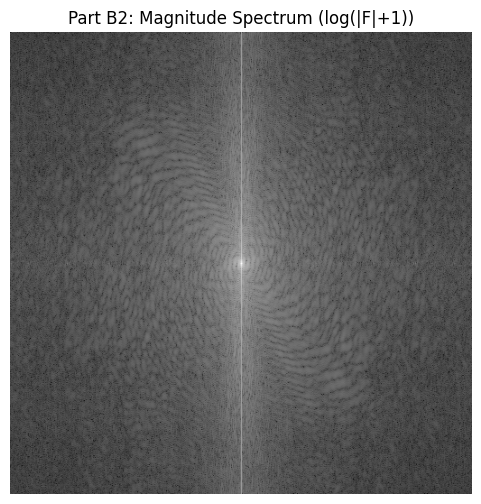

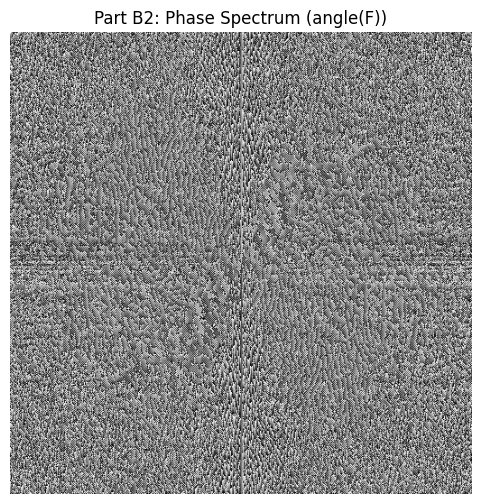

In [22]:
# Part B
# B1: Compute FFT of grayscale image (by NumPy method) and shift low-frequencies to center

gray_float = gray_np.astype(np.float32)

f = np.fft.fft2(gray_float)
fshift = np.fft.fftshift(f)

print("FFT shape:", fshift.shape, "dtype:", fshift.dtype)

# B2: Magnitude & Phase + Magnitude Spectrum visualization
magnitude = np.abs(fshift)
phase = np.angle(fshift)

mag_spectrum = np.log(magnitude + 1.0)

show(mag_spectrum, "Part B2: Magnitude Spectrum (log(|F|+1))", cmap="gray")
show(phase, "Part B2: Phase Spectrum (angle(F))", cmap="gray")


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [23]:
# Helper function for showing rows of images at a time
def show_row(images, titles, cmap=None, figsize=(16,4)):
  n = len(images)
  plt.figure(figsize=figsize)
  for i, (im, t) in enumerate(zip(images, titles), 1):
    plt.subplot(1, n, i)
    if cmap is None:
      plt.imshow(im)
    else:
      plt.imshow(im, cmap=cmap)
    plt.title(t)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

Part C1 Reason: Smaller radius keeps fewer frequencies -> stronger low-pass -> more blur/smoothing as low frequency means slower change of features across the pictures. Larger radius keeps more frequencies (higher frequencies) -> less blur (more details like edges, texture preserved due to faster change across the picture).


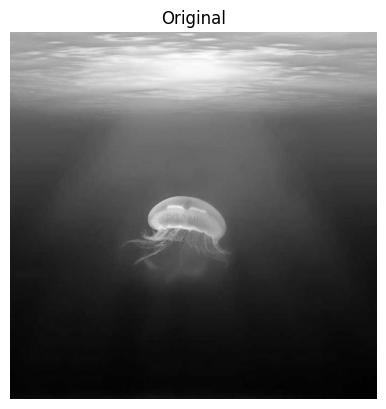

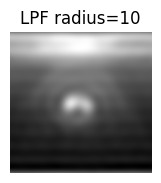

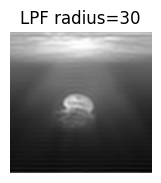

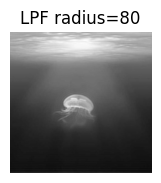

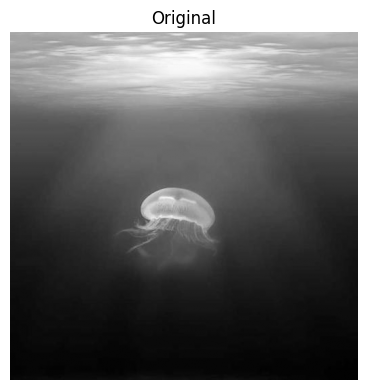

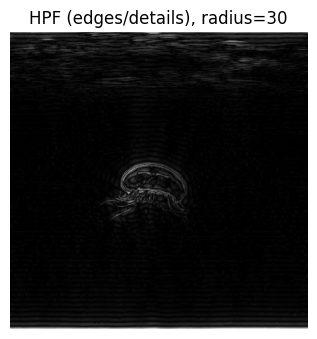

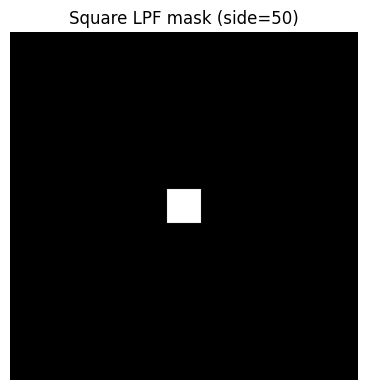

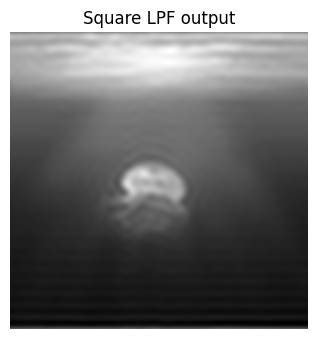

In [24]:
# Part C
rows, cols = gray_float.shape
crow, ccol = rows // 2, cols // 2

Y, X = np.ogrid[:rows, :cols]
dist = np.sqrt((Y - crow)**2 + (X - ccol)**2)

def circular_lpf_mask(radius: int) -> np.ndarray:
    # 1 inside the circle (capture low frequencies), 0 outside
    return (dist <= radius).astype(np.float32)

# C1: 3 LPF masks (radii 10, 30, 80)
radii = [10, 30, 80]
lpf_outputs = []

for r in radii:
    mask_lpf = circular_lpf_mask(r)
    f_lpf = fshift * mask_lpf

    img_back = np.fft.ifft2(np.fft.ifftshift(f_lpf))
    img_back = np.abs(img_back)

    lpf_outputs.append(img_back)

print("Part C1 Reason: Smaller radius keeps fewer frequencies -> stronger low-pass -> more blur/smoothing as low frequency means slower change of features across the pictures. Larger radius keeps more frequencies (higher frequencies) -> less blur (more details like edges, texture preserved due to faster change across the picture).")

show_row([normalize01(gray_float)] + [normalize01(o) for o in lpf_outputs],
         ["Original"] + [f"LPF radius={r}" for r in radii],
         cmap="gray")

# C2: HPF mask (complement of an LPF)
# Using radius=30 as a reasonable cutoff for edge/detail extraction.
mask_lpf_30 = circular_lpf_mask(30)
mask_hpf_30 = 1.0 - mask_lpf_30

f_hpf = fshift * mask_hpf_30
img_hpf = np.fft.ifft2(np.fft.ifftshift(f_hpf))
img_hpf = np.abs(img_hpf)

show_row([normalize01(gray_float), normalize01(img_hpf)],
         ["Original", "HPF (edges/details), radius=30"],
         cmap="gray")

# C3: Square LPF mask (side=50 centered)
side = 50
mask_sq = np.zeros((rows, cols), dtype=np.float32)
half = side // 2
mask_sq[crow-half:crow+half, ccol-half:ccol+half] = 1.0

f_sq = fshift * mask_sq
img_sq = np.fft.ifft2(np.fft.ifftshift(f_sq))
img_sq = np.abs(img_sq)

show_row([mask_sq, normalize01(img_sq)],
         ["Square LPF mask (side=50)", "Square LPF output"],
         cmap="gray")


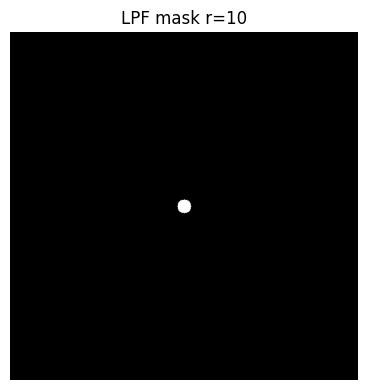

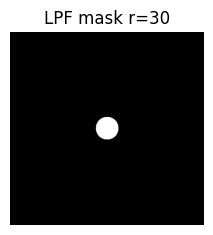

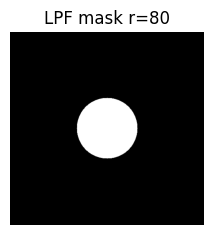

In [25]:
#Vsualizing circular masks used above
masks = [circular_lpf_mask(r) for r in radii]
show_row(masks, [f"LPF mask r={r}" for r in radii], cmap="gray")


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

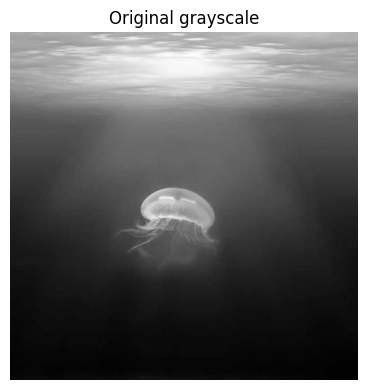

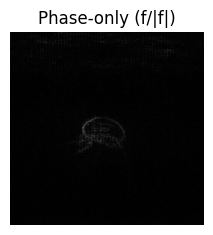

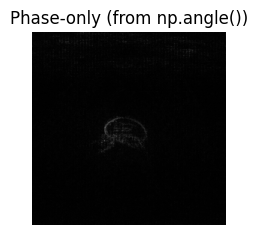

Part D1 Comment: The reconstructed image preserves major structures/edges because phase carries spatial alignment information. Texture/contrast differs because magnitude is discarded.


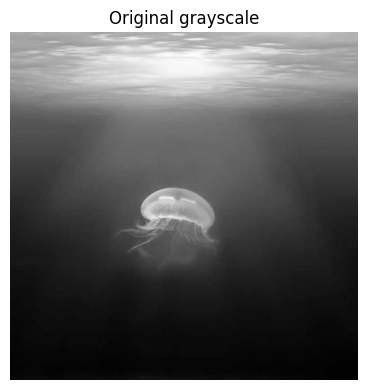

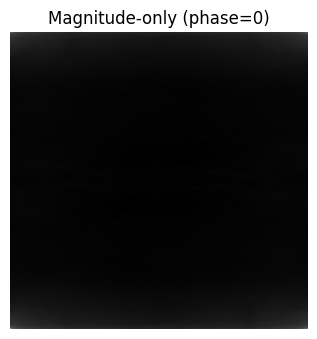

Part D2 Guess : In magnitude spectrum plots, log() is used because |F| has a huge dynamic range: low frequencies can dominate by orders of magnitude, making the spectrum look like a bright blob without log. log compression lets us see mid/high-frequency details and patterns.


In [26]:
# Part D

# D1: Phase-only reconstruction
# phase_only = fshift / |fshift|  (clipping: adding epsilon to avoid divide-by-zero issues)
phase_only = fshift / (np.abs(fshift) + 1e-8)

img_phase = np.fft.ifft2(np.fft.ifftshift(phase_only))
img_phase = np.abs(img_phase)

# Difference vs lecture's np.angle(f_shift):
# - np.angle(fshift) returns ONLY the phase angles (real numbers), not a complex spectrum.
# - To reconstruct from angles, I converted it back to complex form: exp(j * angle).
phase_angles = np.angle(fshift)
phase_complex = np.exp(1j * phase_angles)  # unit magnitude, same phase
img_phase_from_angle = np.fft.ifft2(np.fft.ifftshift(phase_complex))
img_phase_from_angle = np.abs(img_phase_from_angle)

show_row([normalize01(gray_float), normalize01(img_phase), normalize01(img_phase_from_angle)],
         ["Original grayscale", "Phase-only (f/|f|)", "Phase-only (from np.angle())"],
         cmap="gray")

print("Part D1 Comment: The reconstructed image preserves major structures/edges because phase carries spatial alignment information. Texture/contrast differs because magnitude is discarded.")

# D2: Magnitude-only reconstruction
mag_only = np.abs(fshift)

# If we set phase=0 everywhere, complex spectrum becomes purely real and non-negative:
mag_complex = mag_only * np.exp(1j * np.zeros_like(mag_only))

img_mag = np.fft.ifft2(np.fft.ifftshift(mag_complex))
img_mag = np.abs(img_mag)

show_row([normalize01(gray_float), normalize01(img_mag)],
         ["Original grayscale", "Magnitude-only (phase=0)"],
         cmap="gray")

print("Part D2 Guess : In magnitude spectrum plots, log() is used because |F| has a huge dynamic range: low frequencies can dominate by orders of magnitude, making the spectrum look like a bright blob without log. log compression lets us see mid/high-frequency details and patterns.")


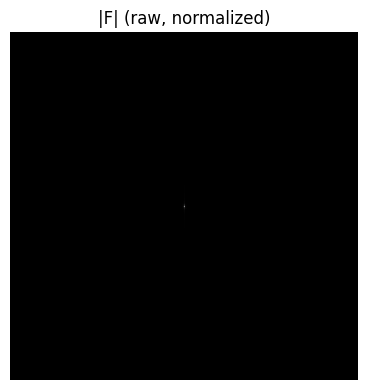

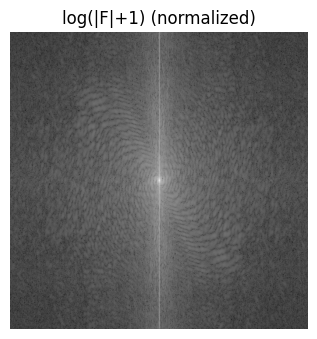

In [27]:
# Magnitude spectrum visualization: raw vs log-compressed
mag_raw = np.abs(fshift)
mag_log = np.log(mag_raw + 1.0)

# For visibility, normalizing each for display
show_row([normalize01(mag_raw), normalize01(mag_log)],
         ["|F| (raw, normalized)", "log(|F|+1) (normalized)"],
         cmap="gray")


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

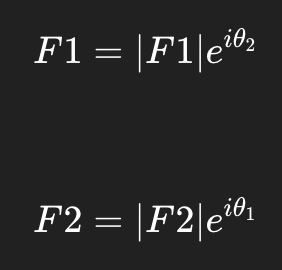

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


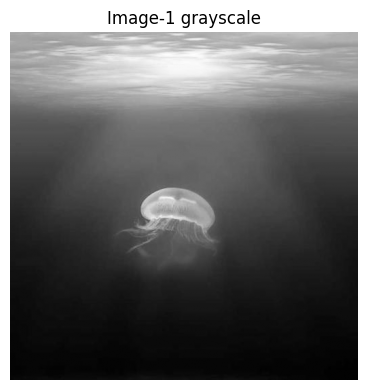

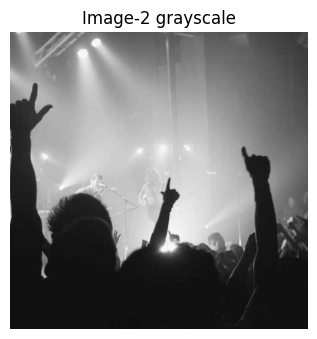

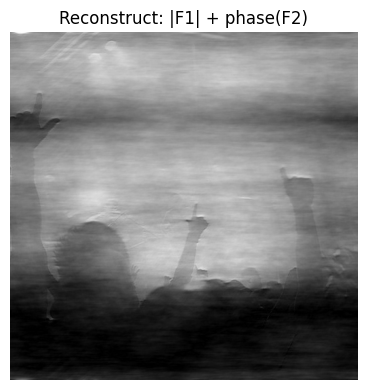

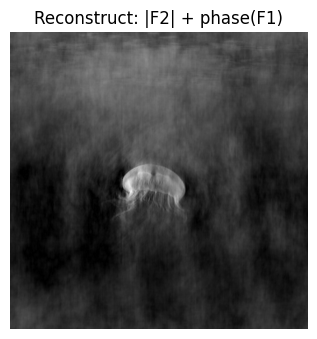

Part E Observation : The phase largely controls the recognizable structure (edges/outlines/where things are), while the magnitude influences texture/contrast/overall frequency energy distribution.


In [28]:
# Bonus - Part E
# Loading a second image, computing FFT, then swapping magnitude and phase between the two images.

img2_bgr = load_bgr_from_url(img_path2)
img2_rgb = to_rgb(img2_bgr)

# Ensuring both images have same shape for swapping in frequency domain
if img2_rgb.shape != img_rgb.shape:
    img2_rgb = cv2.resize(img2_rgb, (img_rgb.shape[1], img_rgb.shape[0]), interpolation=cv2.INTER_AREA)

# Converting to grayscale (NumPy weighted sum, same as before)
img2_rgb_f = img2_rgb.astype(np.float32)
R2, G2, B2 = img2_rgb_f[..., 0], img2_rgb_f[..., 1], img2_rgb_f[..., 2]
gray2 = 0.299 * R2 + 0.587 * G2 + 0.114 * B2

# FFTs (shifted)
F1 = np.fft.fftshift(np.fft.fft2(gray_float.astype(np.float32)))
F2 = np.fft.fftshift(np.fft.fft2(gray2.astype(np.float32)))

mag1, ph1 = np.abs(F1), np.angle(F1)
mag2, ph2 = np.abs(F2), np.angle(F2)

# Swap: magnitude from one and phase from the other
F_mag1_phase2 = mag1 * np.exp(1j * ph2)
F_mag2_phase1 = mag2 * np.exp(1j * ph1)

img_mag1_phase2 = np.abs(np.fft.ifft2(np.fft.ifftshift(F_mag1_phase2)))
img_mag2_phase1 = np.abs(np.fft.ifft2(np.fft.ifftshift(F_mag2_phase1)))

# Display
show_row([normalize01(gray_float), normalize01(gray2)],
         ["Image-1 grayscale", "Image-2 grayscale"],
         cmap="gray", figsize=(12,4))

show_row([normalize01(img_mag1_phase2), normalize01(img_mag2_phase1)],
         ["Reconstruct: |F1| + phase(F2)", "Reconstruct: |F2| + phase(F1)"],
         cmap="gray", figsize=(12,4))

print("Part E Observation : The phase largely controls the recognizable structure (edges/outlines/where things are), while the magnitude influences texture/contrast/overall frequency energy distribution.")
